Файл содержит следующие столбцы:

ID: уникальный идентификатор заказа

Order Date: дата заказа

Class: класс заказа

Region: регион



Sub-Category: подгруппа товаров

Sales: сумма продаж



Результаты:

а) Наиболее часто покупаемые подгруппы товаров за всё время продаж:

Binders - 1492

Furnishings - 310

Phones - 291

Paper - 1338




б) Наиболее часто покупаемые подгруппы товаров за последние два года:

Binders - 907

Paper - 810

Furnishings - 558

Phones - 511

в) Наиболее часто покупаемые подгруппы товаров за последний год:

Binders - 496

Furnishings - 931

Phones - 876

Paper - 454



Вывод:

На протяжении всего периода, а также в последние два года и последний год, подгруппы Binders и Paper являются наиболее популярными. Furnishings и Phones также входят в топ-4, но их популярность остается на более низком уровне по сравнению с первыми двумя категориями


--2024-09-06 16:53:57--  https://github.com/Agamergen/agamergen/raw/main/train.xlsx
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Agamergen/agamergen/main/train.xlsx [following]
--2024-09-06 16:53:57--  https://raw.githubusercontent.com/Agamergen/agamergen/main/train.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 330908 (323K) [application/octet-stream]
Saving to: ‘train.xlsx.4’

train.xlsx.4        100%[===================>] 323.15K  --.-KB/s    in 0.04s   

2024-09-06 16:53:57 (7.26 MB/s) - ‘train.xlsx.4’ saved [330908/330908]

Columns in the DataFrame: Index(['ID', 'Order Date', 'Clas

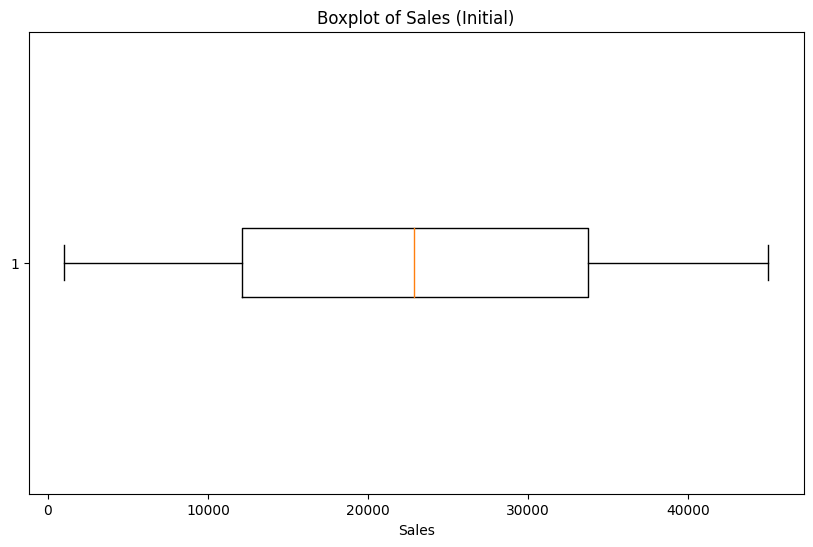

In [9]:
# Step 1: Download the file
!wget https://github.com/Agamergen/agamergen/raw/main/train.xlsx

# Step 2: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 3: Load the Excel file into a DataFrame
df = pd.read_excel('train.xlsx')

# Step 4: Check the structure of the DataFrame
print("Columns in the DataFrame:", df.columns)
print("First few rows of the DataFrame:")
print(df.head())

# Step 5: Create a boxplot if 'Sales' column exists
if 'Sales' in df.columns:
    plt.figure(figsize=(10, 6))
    plt.boxplot(df['Sales'].dropna(), vert=False)  # dropna() to handle any missing values
    plt.title('Boxplot of Sales (Initial)')
    plt.xlabel('Sales')
    plt.show()
else:
    print("The column 'Sales' does not exist in the DataFrame.")


In [11]:
# Первоначальный график boxplot показывает наличие выбросов в данных о продажах.

# Calculate mean and standard deviation of sales
mean_sales = df['Sales'].mean()
std_sales = df['Sales'].std()

# Apply the three-sigma rule to filter out outliers
lower_bound = mean_sales - 3 * std_sales
upper_bound = mean_sales + 3 * std_sales


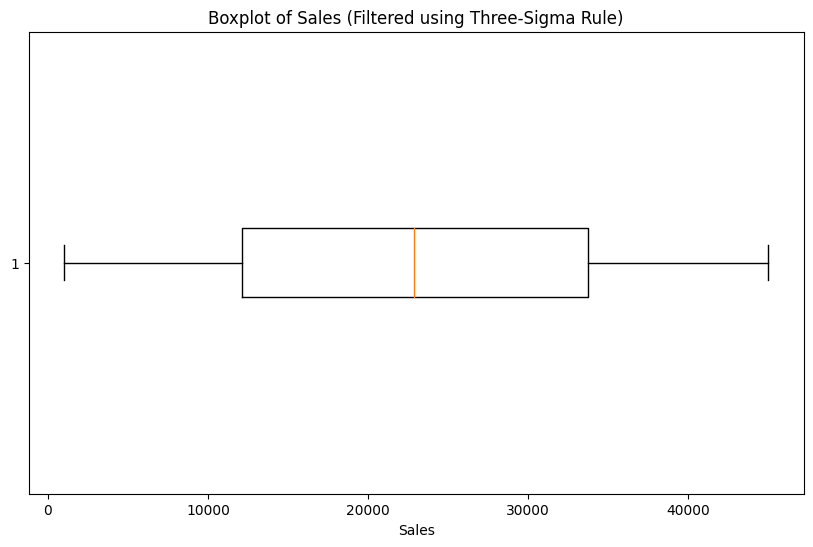

In [12]:
df_filtered = df[(df['Sales'] >= lower_bound) & (df['Sales'] <= upper_bound)]

# Plot the filtered boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(df_filtered['Sales'], vert=False)
plt.title('Boxplot of Sales (Filtered using Three-Sigma Rule)')
plt.xlabel('Sales')
plt.show()


<ipython-input-13-2e7257c5ca76>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['Region', 'Sale_group'])['Sales'].agg(['count', 'sum', 'mean']).reset_index()
<ipython-input-13-2e7257c5ca76>:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['Region', 'Sale_group'])['Sales'].agg(['count', 'sum', 'mean']).reset_index()


         Region Sale_group  count           sum          mean
5    Калиниград    Высокие   1009  3.790437e+07  37566.277532
2   Владивосток    Высокие    956  3.581224e+07  37460.497312
11         Урал    Высокие    758  2.825832e+07  37280.111082
4    Калиниград    Средние   1093  2.515241e+07  23012.267795
8        Москва    Высокие    544  2.037922e+07  37461.806820
1   Владивосток    Средние    884  2.030969e+07  22974.767613
10         Урал    Средние    753  1.718101e+07  22816.742855
7        Москва    Средние    536  1.225589e+07  22865.475168
3    Калиниград  Маленькие   1038  8.873517e+06   8548.667623
0   Владивосток  Маленькие    945  7.830757e+06   8286.515222
9          Урал  Маленькие    766  6.419256e+06   8380.229930
6        Москва  Маленькие    518  4.256534e+06   8217.246938
         Region Sale_group  count           sum          mean
5    Калиниград    Высокие   1009  3.790437e+07  37566.277532
2   Владивосток    Высокие    956  3.581224e+07  37460.497312
11      

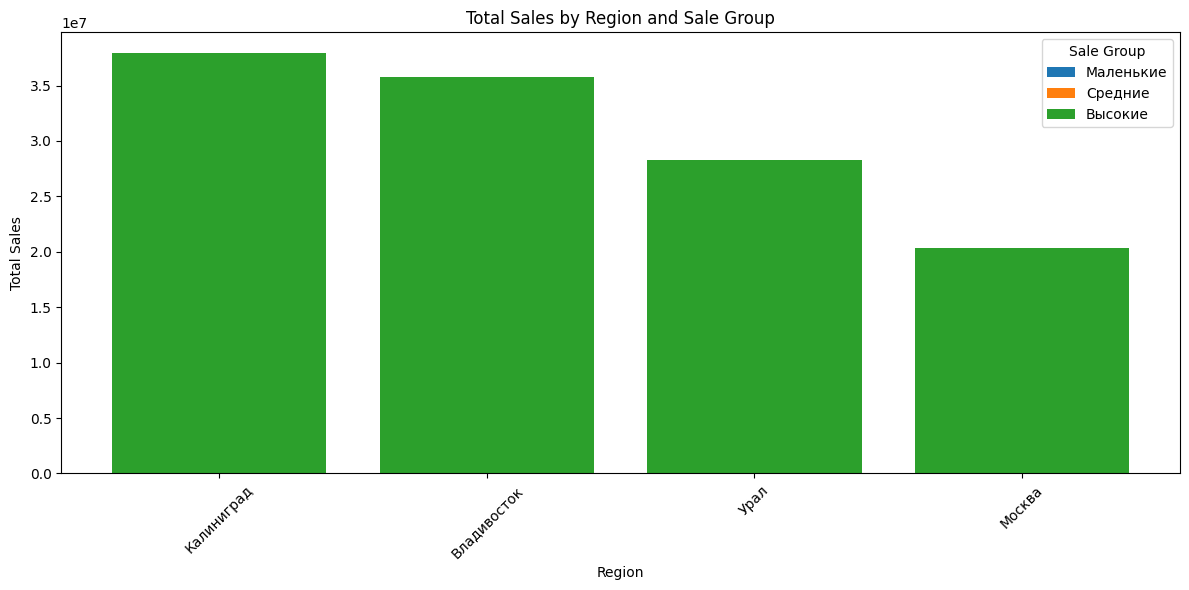

In [13]:
import pandas as pd

# Define thresholds for sale groups
small_threshold = df['Sales'].quantile(1/3)
medium_threshold = df['Sales'].quantile(2/3)

# Create Sale_group categories
df['Sale_group'] = pd.cut(df['Sales'],
                          bins=[-float('inf'), small_threshold, medium_threshold, float('inf')],
                          labels=['Маленькие', 'Средние', 'Высокие'])

# Group the Data: Group by Region and Sale_group, and calculate the count, sum, and mean of sales.

# Group data by Region and Sale_group
grouped_data = df.groupby(['Region', 'Sale_group'])['Sales'].agg(['count', 'sum', 'mean']).reset_index()

# Sort by total sales in descending order
grouped_data = grouped_data.sort_values(by='sum', ascending=False)

print(grouped_data)

3.

# Import necessary libraries
import pandas as pd

# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Define thresholds for sale groups based on quantiles
small_threshold = df['Sales'].quantile(1/3)
medium_threshold = df['Sales'].quantile(2/3)

# Assign Sale_group categories
df['Sale_group'] = pd.cut(df['Sales'],
                          bins=[-float('inf'), small_threshold, medium_threshold, float('inf')],
                          labels=['Маленькие', 'Средние', 'Высокие'])
# Group data by Region and Sale_group, then calculate the count, sum, and mean of sales for each group
grouped_data = df.groupby(['Region', 'Sale_group'])['Sales'].agg(['count', 'sum', 'mean']).reset_index()

# Sort by total sales in descending order
grouped_data = grouped_data.sort_values(by='sum', ascending=False)

# Display the grouped data to identify the most profitable group and observe patterns
print(grouped_data)

# Optionally, visualize the results using a bar plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
for sale_group in ['Маленькие', 'Средние', 'Высокие']:
    subset = grouped_data[grouped_data['Sale_group'] ==

sale_group]
    plt.bar(subset['Region'], subset['sum'], label=sale_group)

plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region and Sale Group')
plt.legend(title='Sale Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
